Spencer Levine
Z23950071

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('data/amazon_products_sales_data_cleaned.csv')

In [2]:
total_nan_per_row = df.isna().sum()
total_nan = df.isna().sum().sum()
print(f"Total NaN per row: {total_nan_per_row}")
print(f"Total NaN values: {total_nan}")

Total NaN per row: product_title               0
product_rating           1024
total_reviews            1024
purchased_last_month    10511
discounted_price         2062
original_price           2062
is_best_seller              0
is_sponsored                0
has_coupon                  0
buy_box_availability    14653
delivery_date           11983
sustainability_tags     39267
product_image_url           0
product_page_url         2069
data_collected_at           0
product_category            0
discount_percentage      2062
dtype: int64
Total NaN values: 86717


In [3]:
df.drop_duplicates()

,product_title,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,is_best_seller,is_sponsored,has_coupon,buy_box_availability,delivery_date,sustainability_tags,product_image_url,product_page_url,data_collected_at,product_category,discount_percentage
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6,375.0,300.0,89.68,159.00,No Badge,Sponsored,Save 15% with coupon,Add to cart,2025-09-01,Carbon impact,https://m.media-amazon.com/images/I/71pAqiVEs3...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Phones,43.60
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3,2457.0,6000.0,9.99,15.99,No Badge,Sponsored,No Coupon,Add to cart,2025-08-29,NaN,https://m.media-amazon.com/images/I/61nbF6aVIP...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,37.52
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6,3044.0,2000.0,314.00,349.00,No Badge,Sponsored,No Coupon,Add to cart,2025-09-01,NaN,https://m.media-amazon.com/images/I/61h78MEXoj...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,10.03
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6,35882.0,10000.0,162.24,162.24,Best Seller,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61SUj2aKoE...,https://www.amazon.com/Apple-Cancellation-Tran...,2025-08-21 11:14:29,Phones,0.00
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8,28988.0,10000.0,72.74,72.74,No Badge,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61bMNCeAUA...,https://www.amazon.com/Apple-MX542LL-A-AirTag-...,2025-08-21 11:14:29,Phones,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42670,"Elgato 4K Pro, Internal Capture Card: 8K60 Pas...",5.0,1.0,100.0,195.99,195.99,No Badge,Organic,No Coupon,NaN,2025-09-04,NaN,https://m.media-amazon.com/images/I/51KCB+egEs...,https://www.amazon.com/Elgato-4K-Pro-Internal-...,2025-08-30 19:56:33,TV & Display,0.00
42671,"Arlo Essential Spotlight Camera, Wireless Secu...",4.2,20.0,200.0,89.99,89.99,No Badge,Organic,Save $25.00 with coupon,Add to cart,2025-09-04,NaN,https://m.media-amazon.com/images/I/51jV+o1LZE...,https://www.amazon.com/Arlo-Essential-Spotligh...,2025-08-30 19:56:33,Cameras,0.00
42672,"GIGABYTE - AORUS FO32U2-32"" QD OLED Gaming Mon...",4.3,57.0,50.0,899.99,1099.99,Save 18%,Organic,No Coupon,Add to cart,2025-09-04,NaN,https://m.media-amazon.com/images/I/71ySPkNLkG...,https://www.amazon.com/GIGABYTE-FO32U2-32-3840...,2025-08-30 19:56:33,Chargers & Cables,18.18
42673,Monoprice XLR Male to 1/4-Inch TRS Male Cable ...,4.7,7102.0,500.0,10.39,15.98,No Badge,Organic,No Coupon,Add to cart,2025-09-04,NaN,https://m.media-amazon.com/images/I/411c0JFJ79...,https://www.amazon.com/Monoprice-XLR-Male-4-In...,2025-08-30 19:56:33,Chargers & Cables,34.98


In [4]:
df= df.dropna(subset=['discounted_price'])
df = df.dropna(subset=['original_price'])

In [5]:
avg_rating = df['product_rating'].mean()

df['product_rating'] = df['product_rating'].fillna(avg_rating)

In [6]:
avg_reviews = df['total_reviews'].mean()
df['total_reviews'] = df['total_reviews'].fillna(avg_reviews)

In [7]:
med_purchased = df['purchased_last_month'].median()
df['purchased_last_month'] = df['purchased_last_month'].fillna(med_purchased)


In [8]:
df['buy_box_availability'] = df['buy_box_availability'].fillna('No')

In [9]:
df = df.drop(columns=['delivery_date'])

In [10]:
df['sustainability_tags'] = df['sustainability_tags'].fillna('None')

In [11]:
df['product_page_url'] = df['product_page_url'].fillna('none')

In [12]:
df.dtypes

product_title               str
product_rating          float64
total_reviews           float64
purchased_last_month    float64
discounted_price        float64
original_price          float64
is_best_seller              str
is_sponsored                str
has_coupon                  str
buy_box_availability        str
sustainability_tags         str
product_image_url           str
product_page_url            str
data_collected_at           str
product_category            str
discount_percentage     float64
dtype: object

In [13]:
nan_rows = df[df.isna().any(axis=1)]
nan_rows

,product_title,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,is_best_seller,is_sponsored,has_coupon,buy_box_availability,sustainability_tags,product_image_url,product_page_url,data_collected_at,product_category,discount_percentage


In [14]:
df['discount_amount'] = df['original_price'] - df['discounted_price']
df

,product_title,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,is_best_seller,is_sponsored,has_coupon,buy_box_availability,sustainability_tags,product_image_url,product_page_url,data_collected_at,product_category,discount_percentage,discount_amount
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6,375.0,300.0,89.68,159.00,No Badge,Sponsored,Save 15% with coupon,Add to cart,Carbon impact,https://m.media-amazon.com/images/I/71pAqiVEs3...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Phones,43.60,69.32
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3,2457.0,6000.0,9.99,15.99,No Badge,Sponsored,No Coupon,Add to cart,None,https://m.media-amazon.com/images/I/61nbF6aVIP...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,37.52,6.00
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6,3044.0,2000.0,314.00,349.00,No Badge,Sponsored,No Coupon,Add to cart,None,https://m.media-amazon.com/images/I/61h78MEXoj...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,10.03,35.00
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6,35882.0,10000.0,162.24,162.24,Best Seller,Organic,No Coupon,No,None,https://m.media-amazon.com/images/I/61SUj2aKoE...,https://www.amazon.com/Apple-Cancellation-Tran...,2025-08-21 11:14:29,Phones,0.00,0.00
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8,28988.0,10000.0,72.74,72.74,No Badge,Organic,No Coupon,No,None,https://m.media-amazon.com/images/I/61bMNCeAUA...,https://www.amazon.com/Apple-MX542LL-A-AirTag-...,2025-08-21 11:14:29,Phones,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42670,"Elgato 4K Pro, Internal Capture Card: 8K60 Pas...",5.0,1.0,100.0,195.99,195.99,No Badge,Organic,No Coupon,No,None,https://m.media-amazon.com/images/I/51KCB+egEs...,https://www.amazon.com/Elgato-4K-Pro-Internal-...,2025-08-30 19:56:33,TV & Display,0.00,0.00
42671,"Arlo Essential Spotlight Camera, Wireless Secu...",4.2,20.0,200.0,89.99,89.99,No Badge,Organic,Save $25.00 with coupon,Add to cart,None,https://m.media-amazon.com/images/I/51jV+o1LZE...,https://www.amazon.com/Arlo-Essential-Spotligh...,2025-08-30 19:56:33,Cameras,0.00,0.00
42672,"GIGABYTE - AORUS FO32U2-32"" QD OLED Gaming Mon...",4.3,57.0,50.0,899.99,1099.99,Save 18%,Organic,No Coupon,Add to cart,None,https://m.media-amazon.com/images/I/71ySPkNLkG...,https://www.amazon.com/GIGABYTE-FO32U2-32-3840...,2025-08-30 19:56:33,Chargers & Cables,18.18,200.00
42673,Monoprice XLR Male to 1/4-Inch TRS Male Cable ...,4.7,7102.0,500.0,10.39,15.98,No Badge,Organic,No Coupon,Add to cart,None,https://m.media-amazon.com/images/I/411c0JFJ79...,https://www.amazon.com/Monoprice-XLR-Male-4-In...,2025-08-30 19:56:33,Chargers & Cables,34.98,5.59


In [15]:
df['total_spent'] = df['purchased_last_month'] * df['discounted_price']
df

,product_title,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,is_best_seller,is_sponsored,has_coupon,buy_box_availability,sustainability_tags,product_image_url,product_page_url,data_collected_at,product_category,discount_percentage,discount_amount,total_spent
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6,375.0,300.0,89.68,159.00,No Badge,Sponsored,Save 15% with coupon,Add to cart,Carbon impact,https://m.media-amazon.com/images/I/71pAqiVEs3...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Phones,43.60,69.32,26904.0
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3,2457.0,6000.0,9.99,15.99,No Badge,Sponsored,No Coupon,Add to cart,None,https://m.media-amazon.com/images/I/61nbF6aVIP...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,37.52,6.00,59940.0
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6,3044.0,2000.0,314.00,349.00,No Badge,Sponsored,No Coupon,Add to cart,None,https://m.media-amazon.com/images/I/61h78MEXoj...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,10.03,35.00,628000.0
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6,35882.0,10000.0,162.24,162.24,Best Seller,Organic,No Coupon,No,None,https://m.media-amazon.com/images/I/61SUj2aKoE...,https://www.amazon.com/Apple-Cancellation-Tran...,2025-08-21 11:14:29,Phones,0.00,0.00,1622400.0
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8,28988.0,10000.0,72.74,72.74,No Badge,Organic,No Coupon,No,None,https://m.media-amazon.com/images/I/61bMNCeAUA...,https://www.amazon.com/Apple-MX542LL-A-AirTag-...,2025-08-21 11:14:29,Phones,0.00,0.00,727400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42670,"Elgato 4K Pro, Internal Capture Card: 8K60 Pas...",5.0,1.0,100.0,195.99,195.99,No Badge,Organic,No Coupon,No,None,https://m.media-amazon.com/images/I/51KCB+egEs...,https://www.amazon.com/Elgato-4K-Pro-Internal-...,2025-08-30 19:56:33,TV & Display,0.00,0.00,19599.0
42671,"Arlo Essential Spotlight Camera, Wireless Secu...",4.2,20.0,200.0,89.99,89.99,No Badge,Organic,Save $25.00 with coupon,Add to cart,None,https://m.media-amazon.com/images/I/51jV+o1LZE...,https://www.amazon.com/Arlo-Essential-Spotligh...,2025-08-30 19:56:33,Cameras,0.00,0.00,17998.0
42672,"GIGABYTE - AORUS FO32U2-32"" QD OLED Gaming Mon...",4.3,57.0,50.0,899.99,1099.99,Save 18%,Organic,No Coupon,Add to cart,None,https://m.media-amazon.com/images/I/71ySPkNLkG...,https://www.amazon.com/GIGABYTE-FO32U2-32-3840...,2025-08-30 19:56:33,Chargers & Cables,18.18,200.00,44999.5
42673,Monoprice XLR Male to 1/4-Inch TRS Male Cable ...,4.7,7102.0,500.0,10.39,15.98,No Badge,Organic,No Coupon,Add to cart,None,https://m.media-amazon.com/images/I/411c0JFJ79...,https://www.amazon.com/Monoprice-XLR-Male-4-In...,2025-08-30 19:56:33,Chargers & Cables,34.98,5.59,5195.0


In [16]:
df['has_discount'] = np.where(df['discount_amount'] > 0 , 'Yes' , 'No').astype(object)
df.dtypes

product_title               str
product_rating          float64
total_reviews           float64
purchased_last_month    float64
discounted_price        float64
original_price          float64
is_best_seller              str
is_sponsored                str
has_coupon                  str
buy_box_availability        str
sustainability_tags         str
product_image_url           str
product_page_url            str
data_collected_at           str
product_category            str
discount_percentage     float64
discount_amount         float64
total_spent             float64
has_discount                str
dtype: object

In [17]:
sale = df.loc[df['discount_amount'] > 0]
sale.head()

,product_title,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,is_best_seller,is_sponsored,has_coupon,buy_box_availability,sustainability_tags,product_image_url,product_page_url,data_collected_at,product_category,discount_percentage,discount_amount,total_spent,has_discount
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6,375.0,300.0,89.68,159.00,No Badge,Sponsored,Save 15% with coupon,Add to cart,Carbon impact,https://m.media-amazon.com/images/I/71pAqiVEs3...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Phones,43.60,69.32,26904.0,Yes
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3,2457.0,6000.0,9.99,15.99,No Badge,Sponsored,No Coupon,Add to cart,None,https://m.media-amazon.com/images/I/61nbF6aVIP...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,37.52,6.00,59940.0,Yes
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6,3044.0,2000.0,314.00,349.00,No Badge,Sponsored,No Coupon,Add to cart,None,https://m.media-amazon.com/images/I/61h78MEXoj...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,10.03,35.00,628000.0,Yes
20,"Energizer AA Batteries Alkaline Power, 32 Coun...",4.8,61157.0,100000.0,16.95,19.98,No Badge,Organic,No Coupon,Add to cart,None,https://m.media-amazon.com/images/I/91-R5huHLn...,none,2025-08-21 11:14:29,Power & Batteries,15.17,3.03,1695000.0,Yes
22,"Amazon Basics Wood-Cased #2 Pencils, Pre-sharp...",4.8,54244.0,100000.0,9.89,14.33,No Badge,Organic,No Coupon,Add to cart,None,https://m.media-amazon.com/images/I/81qxJ-PgGL...,https://www.amazon.com/AmazonBasics-Pre-sharpe...,2025-08-21 11:14:29,Other Electronics,30.98,4.44,989000.0,Yes


In [18]:
no_sale = df.loc[df['discount_amount'] == 0]
no_sale.head()

,product_title,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,is_best_seller,is_sponsored,has_coupon,buy_box_availability,sustainability_tags,product_image_url,product_page_url,data_collected_at,product_category,discount_percentage,discount_amount,total_spent,has_discount
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6,35882.0,10000.0,162.24,162.24,Best Seller,Organic,No Coupon,No,None,https://m.media-amazon.com/images/I/61SUj2aKoE...,https://www.amazon.com/Apple-Cancellation-Tran...,2025-08-21 11:14:29,Phones,0.0,0.0,1622400.0,No
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8,28988.0,10000.0,72.74,72.74,No Badge,Organic,No Coupon,No,None,https://m.media-amazon.com/images/I/61bMNCeAUA...,https://www.amazon.com/Apple-MX542LL-A-AirTag-...,2025-08-21 11:14:29,Phones,0.0,0.0,727400.0,No
5,Texas Instruments TI-84 Plus CE Color Graphing...,4.6,44522.0,100000.0,99.95,99.95,Best Seller,Organic,No Coupon,No,None,https://m.media-amazon.com/images/I/71AyPChhFd...,https://www.amazon.com/Texas-Instruments-TI-84...,2025-08-21 11:14:29,Other Electronics,0.0,0.0,9995000.0,No
6,"Apple AirPods 4 Wireless Earbuds, Bluetooth He...",4.5,13466.0,10000.0,88.11,88.11,No Badge,Organic,No Coupon,No,None,https://m.media-amazon.com/images/I/61iBtxCUab...,https://www.amazon.com/Apple-Bluetooth-Headpho...,2025-08-21 11:14:29,Phones,0.0,0.0,881100.0,No
7,Apple AirTag. Keep Track of and find Your Keys...,4.6,38105.0,10000.0,23.04,23.04,Best Seller,Organic,No Coupon,No,None,https://m.media-amazon.com/images/I/71rP7f78eF...,https://www.amazon.com/Apple-MX532LL-A-AirTag/...,2025-08-21 11:14:29,Phones,0.0,0.0,230400.0,No


In [19]:
df.rename(columns={'product_title' : 'product_name'}, inplace=True)
df

,product_name,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,is_best_seller,is_sponsored,has_coupon,buy_box_availability,sustainability_tags,product_image_url,product_page_url,data_collected_at,product_category,discount_percentage,discount_amount,total_spent,has_discount
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6,375.0,300.0,89.68,159.00,No Badge,Sponsored,Save 15% with coupon,Add to cart,Carbon impact,https://m.media-amazon.com/images/I/71pAqiVEs3...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Phones,43.60,69.32,26904.0,Yes
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3,2457.0,6000.0,9.99,15.99,No Badge,Sponsored,No Coupon,Add to cart,None,https://m.media-amazon.com/images/I/61nbF6aVIP...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,37.52,6.00,59940.0,Yes
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6,3044.0,2000.0,314.00,349.00,No Badge,Sponsored,No Coupon,Add to cart,None,https://m.media-amazon.com/images/I/61h78MEXoj...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,10.03,35.00,628000.0,Yes
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6,35882.0,10000.0,162.24,162.24,Best Seller,Organic,No Coupon,No,None,https://m.media-amazon.com/images/I/61SUj2aKoE...,https://www.amazon.com/Apple-Cancellation-Tran...,2025-08-21 11:14:29,Phones,0.00,0.00,1622400.0,No
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8,28988.0,10000.0,72.74,72.74,No Badge,Organic,No Coupon,No,None,https://m.media-amazon.com/images/I/61bMNCeAUA...,https://www.amazon.com/Apple-MX542LL-A-AirTag-...,2025-08-21 11:14:29,Phones,0.00,0.00,727400.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42670,"Elgato 4K Pro, Internal Capture Card: 8K60 Pas...",5.0,1.0,100.0,195.99,195.99,No Badge,Organic,No Coupon,No,None,https://m.media-amazon.com/images/I/51KCB+egEs...,https://www.amazon.com/Elgato-4K-Pro-Internal-...,2025-08-30 19:56:33,TV & Display,0.00,0.00,19599.0,No
42671,"Arlo Essential Spotlight Camera, Wireless Secu...",4.2,20.0,200.0,89.99,89.99,No Badge,Organic,Save $25.00 with coupon,Add to cart,None,https://m.media-amazon.com/images/I/51jV+o1LZE...,https://www.amazon.com/Arlo-Essential-Spotligh...,2025-08-30 19:56:33,Cameras,0.00,0.00,17998.0,No
42672,"GIGABYTE - AORUS FO32U2-32"" QD OLED Gaming Mon...",4.3,57.0,50.0,899.99,1099.99,Save 18%,Organic,No Coupon,Add to cart,None,https://m.media-amazon.com/images/I/71ySPkNLkG...,https://www.amazon.com/GIGABYTE-FO32U2-32-3840...,2025-08-30 19:56:33,Chargers & Cables,18.18,200.00,44999.5,Yes
42673,Monoprice XLR Male to 1/4-Inch TRS Male Cable ...,4.7,7102.0,500.0,10.39,15.98,No Badge,Organic,No Coupon,Add to cart,None,https://m.media-amazon.com/images/I/411c0JFJ79...,https://www.amazon.com/Monoprice-XLR-Male-4-In...,2025-08-30 19:56:33,Chargers & Cables,34.98,5.59,5195.0,Yes


In [20]:
df['purchased_last_month'] = df['purchased_last_month'].astype(int)
df

,product_name,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,is_best_seller,is_sponsored,has_coupon,buy_box_availability,sustainability_tags,product_image_url,product_page_url,data_collected_at,product_category,discount_percentage,discount_amount,total_spent,has_discount
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6,375.0,300,89.68,159.00,No Badge,Sponsored,Save 15% with coupon,Add to cart,Carbon impact,https://m.media-amazon.com/images/I/71pAqiVEs3...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Phones,43.60,69.32,26904.0,Yes
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3,2457.0,6000,9.99,15.99,No Badge,Sponsored,No Coupon,Add to cart,None,https://m.media-amazon.com/images/I/61nbF6aVIP...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,37.52,6.00,59940.0,Yes
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6,3044.0,2000,314.00,349.00,No Badge,Sponsored,No Coupon,Add to cart,None,https://m.media-amazon.com/images/I/61h78MEXoj...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,10.03,35.00,628000.0,Yes
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6,35882.0,10000,162.24,162.24,Best Seller,Organic,No Coupon,No,None,https://m.media-amazon.com/images/I/61SUj2aKoE...,https://www.amazon.com/Apple-Cancellation-Tran...,2025-08-21 11:14:29,Phones,0.00,0.00,1622400.0,No
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8,28988.0,10000,72.74,72.74,No Badge,Organic,No Coupon,No,None,https://m.media-amazon.com/images/I/61bMNCeAUA...,https://www.amazon.com/Apple-MX542LL-A-AirTag-...,2025-08-21 11:14:29,Phones,0.00,0.00,727400.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42670,"Elgato 4K Pro, Internal Capture Card: 8K60 Pas...",5.0,1.0,100,195.99,195.99,No Badge,Organic,No Coupon,No,None,https://m.media-amazon.com/images/I/51KCB+egEs...,https://www.amazon.com/Elgato-4K-Pro-Internal-...,2025-08-30 19:56:33,TV & Display,0.00,0.00,19599.0,No
42671,"Arlo Essential Spotlight Camera, Wireless Secu...",4.2,20.0,200,89.99,89.99,No Badge,Organic,Save $25.00 with coupon,Add to cart,None,https://m.media-amazon.com/images/I/51jV+o1LZE...,https://www.amazon.com/Arlo-Essential-Spotligh...,2025-08-30 19:56:33,Cameras,0.00,0.00,17998.0,No
42672,"GIGABYTE - AORUS FO32U2-32"" QD OLED Gaming Mon...",4.3,57.0,50,899.99,1099.99,Save 18%,Organic,No Coupon,Add to cart,None,https://m.media-amazon.com/images/I/71ySPkNLkG...,https://www.amazon.com/GIGABYTE-FO32U2-32-3840...,2025-08-30 19:56:33,Chargers & Cables,18.18,200.00,44999.5,Yes
42673,Monoprice XLR Male to 1/4-Inch TRS Male Cable ...,4.7,7102.0,500,10.39,15.98,No Badge,Organic,No Coupon,Add to cart,None,https://m.media-amazon.com/images/I/411c0JFJ79...,https://www.amazon.com/Monoprice-XLR-Male-4-In...,2025-08-30 19:56:33,Chargers & Cables,34.98,5.59,5195.0,Yes


In [21]:
median_price = df['original_price'].median()
cheap = df.loc[df['original_price'] < median_price]
expensive = df.loc[df['original_price'] >= median_price]

In [22]:
cheap.head()

,product_name,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,is_best_seller,is_sponsored,has_coupon,buy_box_availability,sustainability_tags,product_image_url,product_page_url,data_collected_at,product_category,discount_percentage,discount_amount,total_spent,has_discount
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3,2457.0,6000,9.99,15.99,No Badge,Sponsored,No Coupon,Add to cart,None,https://m.media-amazon.com/images/I/61nbF6aVIP...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,37.52,6.0,59940.0,Yes
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8,28988.0,10000,72.74,72.74,No Badge,Organic,No Coupon,No,None,https://m.media-amazon.com/images/I/61bMNCeAUA...,https://www.amazon.com/Apple-MX542LL-A-AirTag-...,2025-08-21 11:14:29,Phones,0.00,0.0,727400.0,No
6,"Apple AirPods 4 Wireless Earbuds, Bluetooth He...",4.5,13466.0,10000,88.11,88.11,No Badge,Organic,No Coupon,No,None,https://m.media-amazon.com/images/I/61iBtxCUab...,https://www.amazon.com/Apple-Bluetooth-Headpho...,2025-08-21 11:14:29,Phones,0.00,0.0,881100.0,No
7,Apple AirTag. Keep Track of and find Your Keys...,4.6,38105.0,10000,23.04,23.04,Best Seller,Organic,No Coupon,No,None,https://m.media-amazon.com/images/I/71rP7f78eF...,https://www.amazon.com/Apple-MX532LL-A-AirTag/...,2025-08-21 11:14:29,Phones,0.00,0.0,230400.0,No
8,Complete Protect: One plan covers all eligible...,4.0,4380.0,200,16.99,16.99,No Badge,Organic,Save 50% with coupon,No,None,https://m.media-amazon.com/images/I/71tZ0n2xP9...,https://www.amazon.com/Asurion-Complete-Protec...,2025-08-21 11:14:29,Other Electronics,0.00,0.0,3398.0,No


In [23]:
df['original_price'].describe()

count    40613.000000
mean       257.611107
std        496.633495
min          2.160000
25%         32.990000
50%         89.000000
75%        229.990000
max       5449.000000
Name: original_price, dtype: float64

In [24]:
df['product_rating'].describe()

count    40613.000000
mean         4.410364
std          0.378345
min          1.000000
25%          4.300000
50%          4.500000
75%          4.700000
max          5.000000
Name: product_rating, dtype: float64

In [25]:
df['price_category'] = pd.cut(x = df['original_price'], bins = [0,50,150,10000], labels = ['Cheap', 'Medium', 'Expensive'])
df

,product_name,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,is_best_seller,is_sponsored,has_coupon,buy_box_availability,sustainability_tags,product_image_url,product_page_url,data_collected_at,product_category,discount_percentage,discount_amount,total_spent,has_discount,price_category
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6,375.0,300,89.68,159.00,No Badge,Sponsored,Save 15% with coupon,Add to cart,Carbon impact,https://m.media-amazon.com/images/I/71pAqiVEs3...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Phones,43.60,69.32,26904.0,Yes,Expensive
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3,2457.0,6000,9.99,15.99,No Badge,Sponsored,No Coupon,Add to cart,None,https://m.media-amazon.com/images/I/61nbF6aVIP...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,37.52,6.00,59940.0,Yes,Cheap
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6,3044.0,2000,314.00,349.00,No Badge,Sponsored,No Coupon,Add to cart,None,https://m.media-amazon.com/images/I/61h78MEXoj...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,10.03,35.00,628000.0,Yes,Expensive
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6,35882.0,10000,162.24,162.24,Best Seller,Organic,No Coupon,No,None,https://m.media-amazon.com/images/I/61SUj2aKoE...,https://www.amazon.com/Apple-Cancellation-Tran...,2025-08-21 11:14:29,Phones,0.00,0.00,1622400.0,No,Expensive
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8,28988.0,10000,72.74,72.74,No Badge,Organic,No Coupon,No,None,https://m.media-amazon.com/images/I/61bMNCeAUA...,https://www.amazon.com/Apple-MX542LL-A-AirTag-...,2025-08-21 11:14:29,Phones,0.00,0.00,727400.0,No,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42670,"Elgato 4K Pro, Internal Capture Card: 8K60 Pas...",5.0,1.0,100,195.99,195.99,No Badge,Organic,No Coupon,No,None,https://m.media-amazon.com/images/I/51KCB+egEs...,https://www.amazon.com/Elgato-4K-Pro-Internal-...,2025-08-30 19:56:33,TV & Display,0.00,0.00,19599.0,No,Expensive
42671,"Arlo Essential Spotlight Camera, Wireless Secu...",4.2,20.0,200,89.99,89.99,No Badge,Organic,Save $25.00 with coupon,Add to cart,None,https://m.media-amazon.com/images/I/51jV+o1LZE...,https://www.amazon.com/Arlo-Essential-Spotligh...,2025-08-30 19:56:33,Cameras,0.00,0.00,17998.0,No,Medium
42672,"GIGABYTE - AORUS FO32U2-32"" QD OLED Gaming Mon...",4.3,57.0,50,899.99,1099.99,Save 18%,Organic,No Coupon,Add to cart,None,https://m.media-amazon.com/images/I/71ySPkNLkG...,https://www.amazon.com/GIGABYTE-FO32U2-32-3840...,2025-08-30 19:56:33,Chargers & Cables,18.18,200.00,44999.5,Yes,Expensive
42673,Monoprice XLR Male to 1/4-Inch TRS Male Cable ...,4.7,7102.0,500,10.39,15.98,No Badge,Organic,No Coupon,Add to cart,None,https://m.media-amazon.com/images/I/411c0JFJ79...,https://www.amazon.com/Monoprice-XLR-Male-4-In...,2025-08-30 19:56:33,Chargers & Cables,34.98,5.59,5195.0,Yes,Cheap


In [26]:
df.groupby(['price_category'],observed=False)['product_rating'].mean().reset_index(name ='Average_Rating')

,price_category,Average_Rating
0,Cheap,4.500200
1,Medium,4.358808
2,Expensive,4.360521


In [27]:
df.groupby(['price_category'],observed=False)['total_reviews'].mean().reset_index()

,price_category,total_reviews
0,Cheap,5437.544471
1,Medium,2151.284053
2,Expensive,1215.547429


In [28]:
df.groupby(['price_category'],observed=False)['product_name'].count().reset_index(name ='Total_products_per_cat')

,price_category,Total_products_per_cat
0,Cheap,14632
1,Medium,11393
2,Expensive,14588


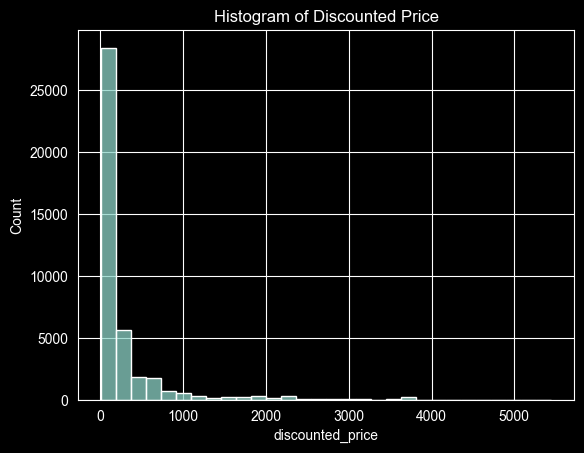

In [29]:
sns.histplot(data = df, x='discounted_price', bins =30)
plt.title('Histogram of Discounted Price')
plt.show()

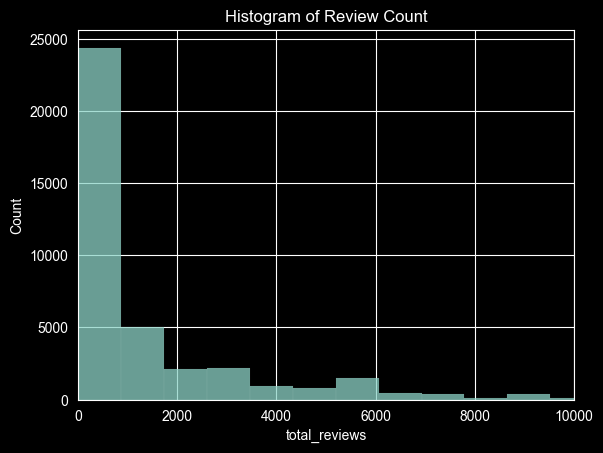

In [30]:
sns.histplot(data = df, x = 'total_reviews', bins = 1000)
plt.title('Histogram of Review Count')
plt.xlim(0, 10000)
plt.show()

Text(0.5, 1.0, 'Boxplot of Product Ratings by Price Category')

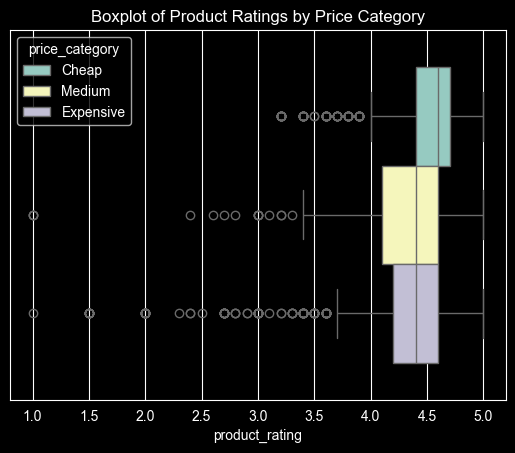

In [31]:
sns.boxplot(data=df, hue = 'price_category', x = 'product_rating')
plt.title('Boxplot of Product Ratings by Price Category')

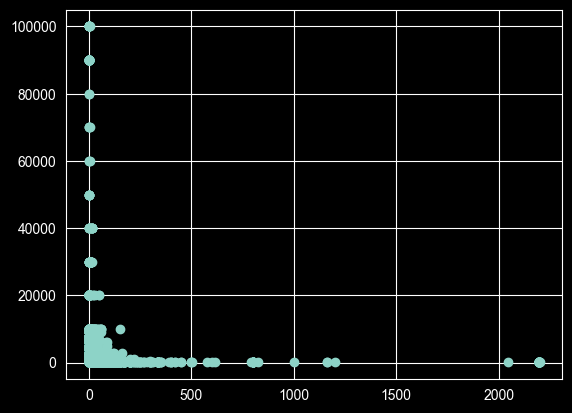

In [37]:
plt.scatter(df['discount_amount'], df['purchased_last_month'])
plt.show()